### 實驗內容描述:
利用新冠肺炎的統計資料進行資料分析和圖表呈現
###實驗結果:
圖表<br/>

1. 確診數最多的十個國家
2. 接種率最高的十個國家
3. 美國每日確診數

資料<br/>
1. 納入統計的所有國家列表
2. 台灣確診數和死亡人數

###結果討論與實驗心得:
非常有趣，期待分析其他種類的資料



In [36]:
!gdown --id '1O9aIm9TRc7UoC38yVtkcE0ryjodBhnJM' --output owid-covid-data.csv

Downloading...
From: https://drive.google.com/uc?id=1O9aIm9TRc7UoC38yVtkcE0ryjodBhnJM
To: /content/owid-covid-data.csv
19.9MB [00:00, 42.7MB/s]


In [37]:
import sklearn.datasets as ds
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')#使用matlab風格
covid = pd.read_csv('owid-covid-data.csv')

In [38]:
ex = ['European Union', 'Europe', 'North America', 'Asia', 'Africa', 'South America', 'World'] #非國家名稱
covid_country = covid[~covid.location.isin(ex)] #先去除全世界的統計值 #~ = exclude
print(len(covid_country['location'].unique())) #共有215國Covid-19的紀錄
print(covid_country['location'].unique())

208
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece'
 'Greenland' 'Grenada' 'Guatemala' 'Guernsey' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Icelan

In [39]:
covid_continent = covid[covid.continent.notnull()] #先去除continent值為null的資料
print(covid_continent['continent'].unique()) #共有六大洲Covid-19的紀錄

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


In [40]:
covid_country.groupby('location').agg({'total_cases':[max],'total_deaths':[max]})
#顯示每個國家的累績確診和累績死亡數

,total_cases,total_deaths
,max,max
location,,
Afghanistan,56226.0,2467.0
Albania,122767.0,2184.0
Algeria,116543.0,3071.0
Andorra,11687.0,114.0
Angola,21914.0,532.0
...,...,...
Venezuela,154165.0,1532.0
Vietnam,2579.0,35.0


In [41]:
covid_taiwan = covid.loc[covid['location'] == 'Taiwan']
print(covid_taiwan['total_cases'].max()) #台灣累績確診人數
print(covid_taiwan['total_deaths'].max()) #台灣累績死亡人數

1012.0
10.0


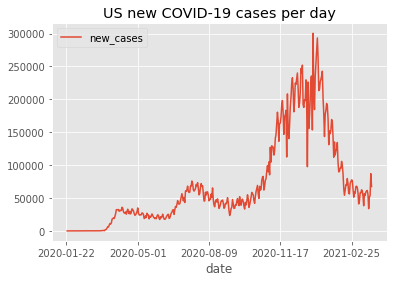

In [42]:
covid_usa = covid.loc[covid['location'] == 'United States']
data = covid_usa[['date','new_cases']] 
data.plot(x='date',y='new_cases',kind = 'line',title='US new COVID-19 cases per day')
plt.show() #顯示美國每天的新確診人數的折線圖

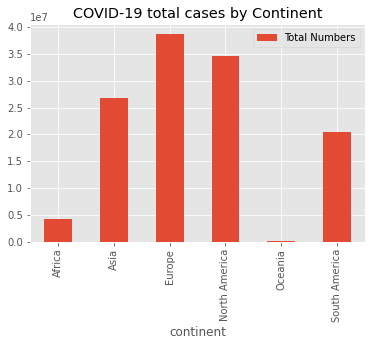

In [43]:
df = covid_continent.groupby('continent', as_index=False)['new_cases'].sum()
df = df.rename(columns={'new_cases':'Total Numbers'})
df.plot(x='continent',y='Total Numbers',kind='bar',title='COVID-19 total cases by Continent')
plt.show() #縣市各大洲的確診人數

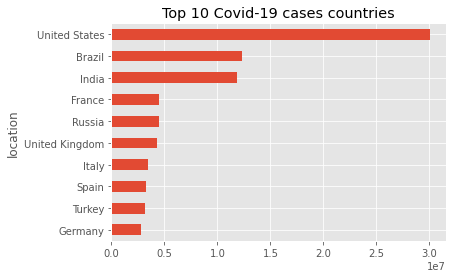

In [44]:
df = covid_country.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
df.plot(y='total_cases',kind='barh',title="Top 10 Covid-19 cases countries").invert_yaxis() #invert_yaxis = 讓最高的上面

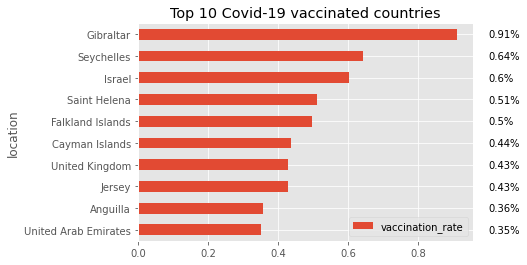

In [148]:
population = covid_country.groupby('location').agg({'population':[max]})
vaccination = covid_country.groupby('location').agg({'people_vaccinated':[max]})
result = pd.concat([population, vaccination], axis=1)
df = (result['people_vaccinated'] / result['population']).sort_values(by='max', ascending=False).head(10) #取接種率前十的國家
df = df.rename(columns={'max': 'vaccination_rate'}) #換column名字
ax = df.plot(y='vaccination_rate',kind='barh')
ax.set_title("Top 10 Covid-19 vaccinated countries")
ax.invert_yaxis()
#加上數字
for i in ax.patches:
  ax.text(i.get_x()+1,i.get_y()+0.4,str(i.get_width().round(2))+'%')